<a href="https://colab.research.google.com/github/alekya0221/DS_Python_ExcelR/blob/main/Corolla_MLR_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Importing Dataset

In [2]:
dscorolla = pd.read_csv('/content/ToyotaCorolla.csv',encoding='latin1')

In [3]:
dscorolla.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
dscorolla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [5]:
corolla=dscorolla.iloc[:, [2, 3, 6, 8, 12, 13, 15, 16, 17]]
corolla

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [6]:
#check for missing values: 
corolla.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [7]:
corolla.corr()


,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [8]:
corolla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


<Axes: >

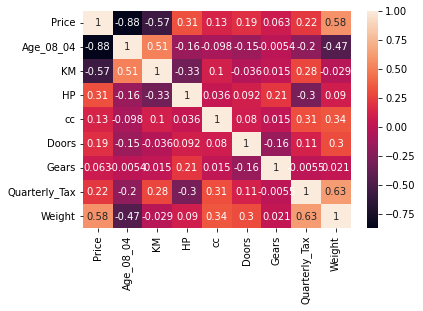

In [9]:
import seaborn as sns
sns.heatmap(corolla.corr(), annot=True)

# Independent and dependent Variables

In [29]:
X = corolla.iloc[:,[1,2,3,4,5,6,7,8]].values
y = corolla.iloc[:,0].values

In [30]:
X

array([[   23, 46986,    90, ...,     5,   210,  1165],
       [   23, 72937,    90, ...,     5,   210,  1165],
       [   24, 41711,    90, ...,     5,   210,  1165],
       ...,
       [   71, 17016,    86, ...,     5,    69,  1015],
       [   70, 16916,    86, ...,     5,    69,  1015],
       [   76,     1,   110, ...,     5,    19,  1114]])

# Splitting the Dataset

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [34]:
X_train

array([[    67, 174833,     72, ...,      5,    185,   1100],
       [    51,  53408,    110, ...,      5,     85,   1080],
       [    60,  61977,     86, ...,      5,     69,   1015],
       ...,
       [    70,  85864,     72, ...,      5,    185,   1135],
       [    50,  39706,    110, ...,      5,     85,   1080],
       [    68, 101001,    110, ...,      5,     85,   1075]])

In [35]:
X_test

array([[    68, 115071,    110, ...,      5,     85,   1055],
       [    52,  99323,    110, ...,      5,     85,   1055],
       [    42,  29640,    110, ...,      5,     85,   1055],
       ...,
       [    67,  42102,    110, ...,      5,     85,   1075],
       [    40,  32532,    110, ...,      5,     69,   1040],
       [    69, 155000,     72, ...,      5,    185,   1115]])

In [36]:
y_test

array([ 7950, 10950, 14950,  7500,  9900,  8900,  6950, 15750, 11950,
        9930,  8500, 10450, 11895,  9950,  6450, 15500, 11950,  6900,
       10950,  9750,  7350,  8950, 13750, 14950, 19950,  9450, 11500,
        8500,  9450,  8800, 11450, 10500, 13750,  8250, 10950, 11950,
        8950, 12900,  9500,  9950,  8950,  9500,  9950, 15500, 10950,
        7500,  9450,  9500, 10845,  8500, 19750,  8950,  7250,  6750,
       10950, 19950, 11000,  8950, 17795, 10500,  5740,  7750, 10950,
       10500, 12500, 12900,  8450,  7950, 19450, 11450,  9500,  4450,
       11690,  7900, 14750, 14990,  9950,  7450,  6950,  8250,  6750,
        6900,  5950, 12750, 11950, 10750,  8950, 11950,  8250,  7450,
        6950, 10750, 17450,  9940,  7950, 12250, 12950, 10950, 12450,
        6900,  8500, 10750,  9700,  9250,  7900, 19000, 18450,  8500,
       13250, 10400, 12500,  9200,  8500,  8250, 13750,  8950,  7950,
       10950,  9900,  7750, 20500,  9950, 13995, 10250,  7950, 23950,
        7950, 11500,

In [37]:
y_train

array([ 5751, 11900,  8500, ...,  8500, 13500,  8950])

# ML ALGORITHM - MUltiple Linear Regression

In [38]:
#Fitting the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [39]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [24]:
y_pred

array([ 8167.17554158, 10517.76427163, 13061.07032505,  7525.34787714,
       10520.12401331,  9467.35416385,  5980.02560406, 15631.3140919 ,
       11210.79333328, 10656.27214785,  6842.04353274, 11359.38762721,
       11817.21302078,  9718.65370549,  7363.47012147, 15527.18118607,
       11148.72355312,  7509.55784797, 13054.62351976,  8634.1794741 ,
        7085.19620863,  6330.56812505, 11630.90145065, 12635.29547332,
       19134.48530541,  7594.35344483, 14138.02873473,  5693.47198885,
        9112.26270149,  7849.98494428, 10594.19967606,  7926.33402726,
       16780.1304787 ,  7151.59867182, 10456.45752181, 12807.90122521,
        9647.35872931, 12402.22050129,  9417.85292371,  9404.20882121,
        9361.94589854, 10584.30939682,  9710.80607818, 16849.00400035,
       10501.34123904,  7379.59767045,  9698.34964509,  7406.89695127,
        8754.62565914,  8612.84022599, 18936.92140321,  8375.84524953,
        7154.9483052 ,  6885.91541232, 11360.24626732, 18257.52668777,
      

In [40]:
y_test

array([ 7950, 10950, 14950,  7500,  9900,  8900,  6950, 15750, 11950,
        9930,  8500, 10450, 11895,  9950,  6450, 15500, 11950,  6900,
       10950,  9750,  7350,  8950, 13750, 14950, 19950,  9450, 11500,
        8500,  9450,  8800, 11450, 10500, 13750,  8250, 10950, 11950,
        8950, 12900,  9500,  9950,  8950,  9500,  9950, 15500, 10950,
        7500,  9450,  9500, 10845,  8500, 19750,  8950,  7250,  6750,
       10950, 19950, 11000,  8950, 17795, 10500,  5740,  7750, 10950,
       10500, 12500, 12900,  8450,  7950, 19450, 11450,  9500,  4450,
       11690,  7900, 14750, 14990,  9950,  7450,  6950,  8250,  6750,
        6900,  5950, 12750, 11950, 10750,  8950, 11950,  8250,  7450,
        6950, 10750, 17450,  9940,  7950, 12250, 12950, 10950, 12450,
        6900,  8500, 10750,  9700,  9250,  7900, 19000, 18450,  8500,
       13250, 10400, 12500,  9200,  8500,  8250, 13750,  8950,  7950,
       10950,  9900,  7750, 20500,  9950, 13995, 10250,  7950, 23950,
        7950, 11500,

In [41]:
#Measuring Accuracy
from sklearn.metrics import mean_absolute_percentage_error, r2_score

mape = mean_absolute_percentage_error(y_true=y_test,y_pred=y_pred)
rsquare = r2_score(y_true=y_test, y_pred=y_pred)

print("MAPE:",mape)
print("Adj.Rsquare:", rsquare)

MAPE: 0.1081560541785464
Adj.Rsquare: 0.5995582859225217


# MLR OPTIMAL MODEL

In [47]:
#Backward Elimination:
X_opt = X[:,:]
X_opt = np.array(X_opt, dtype=float)
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          1.247e+04
Date:                Mon, 27 Mar 2023   Prob (F-statistic):                        0.00
Time:                        09:54:11   Log-Likelihood:                         -12383.
No. Observations:                1436   AIC:                                  2.478e+04
Df Residuals:                    1428   BIC:                                  2.482e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -125.4510      2.445    -51.303      0.000    -130.248    -120.654
x2            -0.0205      0.001    -16.305      0.000      -0.023      -0.018
x3            33.4737      2.796     11.973      0.000      27.990      38.958
x4            -0.1032      0.090     -1.141      0.254      -0.281       0.074
x5            -7.2494     40.184     -0.180      0.857     -86.075      71.576
x6            78.3780    148.258      0.529      0.597    -212.449     369.205
x7             5.8258      1.227      4.748      0.000       3.419       8.233
x8            14.0322      0.773     18.157      0.000      12.516      15.548
==============================================================================
Omnibus:                      108.641   Durbin-Watson:                   1.509
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              562.996
Skew:                           0.019   Prob(JB):                    5.59e-123
Kurtosis:                       6.067   Cond. No.                     3.26e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X_opt = X[:, [0,1,3,4,5]]
X_opt = np.array(X_opt, dtype=float)
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()
regressor_OLS.summary()

In [ ]:
X_opt = X[:, [0,3,4,5]]
X_opt = np.array(X_opt, dtype=float)
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()
regressor_OLS.summary()

In [ ]:
X_opt = X[:, [0,3,5]]
X_opt = np.array(X_opt, dtype=float)
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()
regressor_OLS.summary()

In [ ]:
X_opt = X[:, [0,3]]
X_opt = np.array(X_opt, dtype=float)
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()
regressor_OLS.summary()
#the inference of this code is we get to know that 3 is the most impacting value for our profit.
#column with index 3 in the actual dataset post adding the states as 0 and 1, check X value post Encoding categorical Data-Index of data points is R&D

# DATA VISUALISATION

In [ ]:
import seaborn as sns
sns.lmplot(x="R&D Spend", y="Profit", data=dataset)